# 1.贝叶斯定理

主要参考PRML 1.2.3

贝叶斯定理的形式为：

$$
p(x\vert y)=\frac{p(y\vert x)p(x)}{p(y)}
$$

假定我们要求出x的概率，但是我们此刻对于x只有一个假设(即x满足一定的`先验概率`p(x)),然后我们需要做多个实验，观察由于x而导致的y出现的频率，根据这些实验的结果，我们就能逐步修正x的概率。

在统计学中，基本分为两大流派，频率学派和贝叶斯学派，下面我们以这两个学派的对比来解释一下上述贝叶斯定理，并给出两个学派之间的异同点

1.频率学派根据时间重复的频率来确定事件的概率。

2.而贝叶斯学派会根据每一个新的事件来修正概率



# 2.贝叶斯分类器的规则
贝叶斯分类器主要利用了贝叶斯公式

假定有n个不同的类别，$C_1,C_2,...,C_n$,我们对每一个输入x需要判断其属于哪一个类别：
$$
p(C_n\vert x)=\frac{p(x\vert C_n) p(C_n)}{p(x)}
$$

为了简化讨论，这里使用两个类别的分类问题，

## 2.1先验概率

随机的一个观察值x属于类别c1和c2的概率被称为先验概率

$$
p_1=P(c_1)\\
p_2=P(c_2)\\
p_1+p_2=1
$$

我们通常根据当前的训练数据来确定类别的先验概率

如果所有训练样本的数目是N，类别C1的样本数目是n1，类别C2的样本数目是C2，那么

$$
p_1=P(C_1)=\frac{n_1}{N}\\
p_2=P(C_2)=\frac{n_2}{N}\\
p_1+p_2=1
$$

## 2.2后验概率

$$
p(C_i\vert x)\\
=\frac{p(x\vert C_i)p(C_i)}{p(x)}\\
=\frac{p(x\vert C_i)p(C_i)}{p(x\vert C_1)p(C_1)+p(x\vert C_2)p(C_2)}\\
=\frac{f_i(x)p_i}{f_1(x)p_1+f_2(x)p_2}
$$

其中$f_i(x)$表示条件概率密度函数，也被称为`似然函数`

## 2.3贝叶斯分类规则

> 如果$p(C_1\vert x)>p(C_2\vert x)$,那么x被分为类别C1

> 如果$p(C_1\vert x)<p(C_2\vert x)$,那么x被分为类别C1

因为

$$
p(C_i\vert x)=\frac{f_i(x)p_i}{f_1(x)p_1+f_2(x)p_2}
$$

因为分母部分相同，所以仅用分子部分即可以判定类别：

$$f_1(x)p_1 \lessgtr_{C_1}^{C_2} f_2(x)p_2$$

# 3.最小化分类误差

参考PRML 1.5.1

上述推导过程中的$f_i(x)p_i$可以改写成联合分布$p(x,C_i)$

<img src='image1.png'>

在上图中给出了$p(x,C_i)$的分布，当$p(x,C_1)>p(x,C_2)$的时候，新的输入被分到类别C1,反之分到类别C2。

如上图所示，我们的决策边界为$\bar x$，决策边界的左侧区域用R1表示，决策边界的右侧区域用R2表示，当x位于R1时候被判定为类别C1，当x在R2的时候被判定为类别C2。

如果原本属于C2的x位于R1就会被判定为类别C2，这样就会发生分类错误。同理，如果原本属于C1的x位于R2就会被判定为类别C1，这样就会发生分类错误.

因此我们要找出属于C2的x有多大可能性会出现在R1，以及属于C1的x有多大可能性会出现在R2

于是分类误差为：

$$
p(mistake)=\int_{R1}p(x,C2)dx+\int_{R2}p(x,C1)dx
$$
这表现在上图中，就是红色、绿色、蓝色部分之和。其中红色加上绿色，表示原本属于C2的输入被误判为C1的概率，而蓝色表示原本属于C1的输入被误判为属于C2的概率。

`因为绿色加上蓝色部分不随着决策边界的移动而减小，而红色在决策边界位于X0的时候消失，所以该点就是能使得分类误差最小的决策边界`。





# 4.贝叶斯分类器

在这一小节，我们假设有m个类别，$\omega_1,\omega_2,....\omega_m$,分类规则如下所示：

<img src='image2.png'>




## 4.1判别函数  Discriminant Function

因为我们通常选择的似然函数$f_i(x)$的形式较为复杂，直接运用上述分类规则计算和处理都比较麻烦，因此我们引入了判别函数的概念，使得我们不直接根据上述分类规则来进行分类，而使用判别函数

<img src='image3.png'>

注意，h(x)需要是一个单调函数，这样，如果$f_i(x)p_i > f_j(x)p_j$，那么$h(f_i(x)p_i) > h(f_j(x)p_j)$。两者之间并不改变相应的大小关系



## 4.2 高斯分类器中的数据分布

在高斯分类器中，我们假设每个类别的数据都满足高斯分布，如果观测值是n维，那么所有数据都满足n变量高斯分布。

<img src='image4.png'>

在上图中 $f_i$表示类别$C_i$的似然函数，即$f_i(x)=p(x\vert C_1)$

$n_i$表示训练数据中属于类别$C_i$的数据点的数目，假设总共有n个数据点，m个类别的数据点总和即表示为：

$$n=n_1+n_2+...+n_m$$

每个类别都满足多变量高斯分布，因此我们可以用这个类别的训练数据来刻画出该类别的分布函数，因此要计算出相应的均值向量$\bar x^{(i)}$与协方差矩阵$\Sigma_i$

## 4.3 判别函数的推导

因为高斯分类器的数据满足多变量高斯分布，因此我们选用对数函数来构造判别函数：

<img src='image5.png'>



## 5. 决策边界的推导

> 决策边界与每个类比的的高斯分布的协方差矩阵和先验概率都有关系，基本可以总结为：

> * 协方差矩阵决定决策边界的法向量$\mathbf{w}$的角度，准确来说是与两个类别的中心点连线的夹角的角度

> * 先验概率相等的时候，决策边界通过两个类别中心点连线的中心点，如果先验概率不行等，根据两者之间的相对大小关系，决策边界通过的点沿着中心点连线移动

### 5.1 协方差矩阵都等于单位阵，先验概率相同
首先我们假设每个类别的高斯分布都有着相同的协方差矩阵和先验概率，那么决策边界的推导如下：

<img src='image8.png'>


1.上图中推导过程中c1与c2被消除是因为

$$c_i=-\frac{d}{2}\ln 2\pi - \frac{1}{2} \ln \vert \Sigma _i \vert$$

而我们假设每个类别的高斯分布都有着相同的协方差矩阵，因此c1与c2被消除

2.我们可以发现此时的决策边界满足直线形式

$$g_{12}(x)=\mathbf{w}^T\mathbf{x}+b$$

其中 

$$\mathbf{w}=\bar x^{(1)}-\bar x^{(2)}$$

可见$\mathbf{w}$是以两个类别中心点为起始点的向量，又因为我们从数学表达式中知道，$\mathbf{w}$是决策边界的法向量，因此决策边界垂直于两个类别中心点的连线





决策边界可以最终化简为：

$$(\bar x^{(1)}-\bar x^{(2)})^T\left\{x- \frac{1}{2}(\bar x^{(1)}+\bar x^{(2)})\right\}=0$$

可见新的边界与$\mathbf{w}$垂直，并且通过两个类别中心点的中心点

下图形象地描述了这一点：
<img src='image9.png'>



### 5.2 协方差矩阵都等于单位阵，先验概率不相等

当先验概率不相等的时候，决策边界的推导如下：
<img src='image12.png'>
 
因为$\mathbf{w}=\bar x^{(1)} - \bar x^{(2)}$，所以决策边界一定还是垂直于两个类别中心点的连线。
$\frac{1}{2}\left( \bar x^{(1)} + \bar x^{(2)}\right)$表示两个类别中心点的中心点，而$\bar x^{(1)} - \bar x^{(2)}$表示一个沿着两个类别中心点连线的向量，不过根据p1和p2的相对大小来决定这个向量的方向，所以决策边界一定垂直通过两个类别中心点的连线，不过通过的位置根据p1和p2的大小而有所改变，当两个相等的时候通过两个类别中心点连线的中心点。

<img src='image13.png'>
如上图所示，当p1<p2的时候，$\ln\frac{p_1}{p2} <0$,因此决策边界通过的点在中线点的左侧，表示为图中的绿色直线


### 5.3 协方差矩阵相等但不等于单位阵，先验概率相等

此时的决策边界推导如下：

<img src='image14.png'>


此时

$$\mathbf{w}^T =\left( \bar x^{(1)}-\bar x^{(2)} \right)^T \Sigma^{-1}\\
\Rightarrow \\
\mathbf{w}=\Sigma^{-1} \left( \bar x^{(1)}-\bar x^{(2)} \right)
$$

可见$\mathbf{w}$并不与两个类别中心点连线平行，所以决策边界并不是垂直于两个类别中心点连线

由于先验概率相等，所以决策边界还是通过两个类别中心点连线的中线点。
下图给出了直观表示：

<img src='image15.png'>

### 5.4 协方差矩阵相等但不等于单位矩阵，先验概率不等

这种情况和5.3很类似，不过决策面没有通过两个类别中心点连线的中心点，还是根据p1和p2的相对大小有所变化。

### 5.5 协方差矩阵不相等

> 协方差矩阵不相等的时候称为高斯二次分类器

对于协方差矩阵不相等的时候，其决策边界推导如下：
<img src='image16.png'>

$$
g_{12}(x)=g_1(x)-g_2(x)\\
=-\frac{1}{2}x^T \Sigma_{1}^{-1}x +\frac{1}{2}x^T \Sigma_{2}^{-1}x + {\bar x^{(1)}}^T \Sigma_{1}^{-1}x -{\bar x^{(2)}}^T \Sigma_{2}^{-1}x -\frac{1}{2}{\bar x^{(1)}}^T \Sigma_{1}^{-1}\bar x^{(1)} +  \frac{1}{2}{\bar x^{(2)}}^T \Sigma_{2}^{-1}\bar x^{(2)} + \ln p_1 -\ln p_2 + c_1 -c_2\\
=-\frac{1}{2} x^T \left(\Sigma_{1}^{-1}-\Sigma_{2}^{-1} \right)x + \left( {\bar x^{(1)}}^T \Sigma_{1}^{-1} - {\bar x^{(2)}}^T \Sigma_{2}^{-1}\right)x + \text{constant}
$$

可见当协方差不相等的时候，决策边界是二次项的：

$$\frac{1}{2}x^T \mathbf{A}x + b^T x + c=0$$

当A的特征值全为正或者全为负的时候，由于$x^TAx$导致x的各个分量二次项为正，形状为一个椭圆，如果有正有负，则是二次曲线(以上对于二维较为明显)

<img src='image17.png'>

<img src='image18.png'>

所以协方差矩阵不相等的时候称为高斯二次分类器

# 6.python 代码实现

## 6.1 绘制高斯分布和决策边界的函数

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:



def plot_data(mean1,mean2,cov1,cov2,p1,p2):
    #产生一个从二维的从-3到3的meshgrid
    x1=np.arange(-6,6,0.2)

    x2=np.arange(-6,6,0.2)

    X1,X2=np.meshgrid(x1,x2)
    
    # 将X1，X2合并起来，作为高斯分布函数的输入
    X_combine=np.vstack(([X1.T], [X2.T])).T
    
    
    F1=multivariate_normal.pdf(X_combine,mean1,cov1)


    F2=multivariate_normal.pdf(X_combine,mean2,cov2)
    

    F=np.maximum(F1,F2)
    
    
    #绘制高斯分布
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(X1, X2, F, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    ax.set_zlim(0, 0.2)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
    
    #绘制两个类别中心点连线与决策边界
    fig1=plt.figure()
    plt.axis('equal') #保证绘制的边框横纵和纵轴比例相同
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    
    #中心点连线
    points=zip(mean1,mean2)
    plt.plot(points[0],points[1],'k-^')
    
    #中心点连线的中心点
    
    plt.plot(sum(points[0])/2.0,sum(points[1])/2.0,'ro')
    Z=p1*multivariate_normal.pdf(X_combine,mean1,cov1)-p2*multivariate_normal.pdf(X_combine,mean2,cov2)

    cs=plt.contour(X1, X2, Z, [0.0], colors='y', linewidths=2, origin='lower')


    
    plt.show()

    

    
    

## 6.2 协方差矩阵都等于单位阵，先验概率相同

在这种情况下，决策边界垂直于两个类别中心线的连线，并且通过连线的中心点

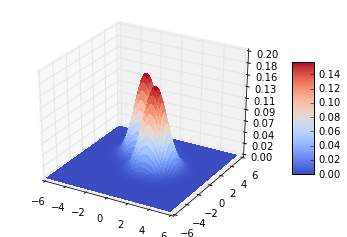

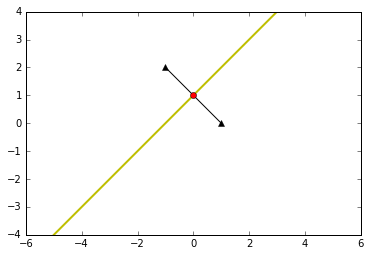

In [3]:
plot_data([-1,2],[1,0],[[1,0],[0,1]],[[1,0],[0,1]],0.5,0.5)

#高斯分布图在去掉 %matplotlib inline 之后可以交互

## 6.3 协方差矩阵都等于单位阵，先验概率不相等

决策边界垂直于两个类别中心点的连线，但不通过连线的中心点

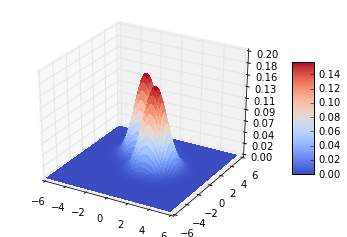

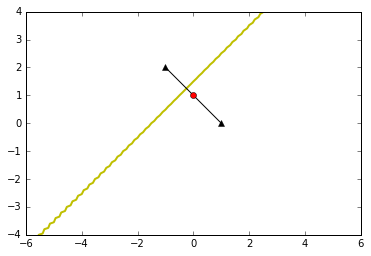

In [4]:
# 先验概率为0.3，0.5
plot_data([-1,2],[1,0],[[1,0],[0,1]],[[1,0],[0,1]],0.3,0.8)

## 6.4 协方差矩阵相等但不等于单位阵，先验概率相等


决策边界不垂直于两个类别中心点连线，但通过连线的中心点

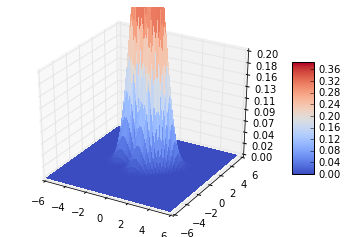

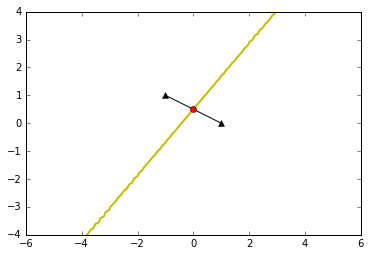

In [5]:
#协方差矩阵等于[[1,0.8],[0.8,1]]
plot_data([-1,1],[1,0],[[0.5,0.3],[0.3,0.5]],[[0.5,0.3],[0.3,0.5]],0.5,0.5)


## 6.5协方差矩阵不相等


决策边界为二次，可能为椭圆或者双曲线等

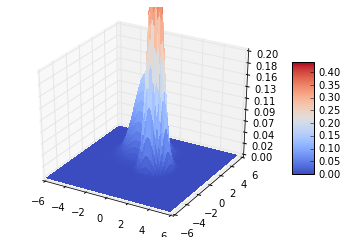

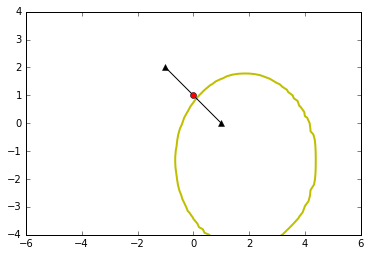

In [6]:
plot_data([-1,2],[1,0],[[1,0],[0,1]],[[0.3,0],[0,0.4]],0.5,0.5)  #椭圆

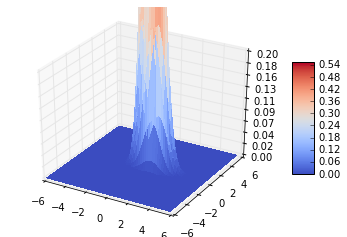

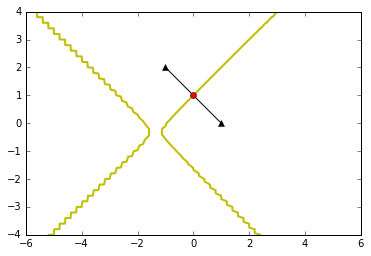

In [7]:
plot_data([-1,2],[1,0],[[0.1,0],[0,0.75]],[[0.7,0],[0,0.1]],0.5,0.5)  # 双曲线

# 6.2  实现一个简单的分类函数

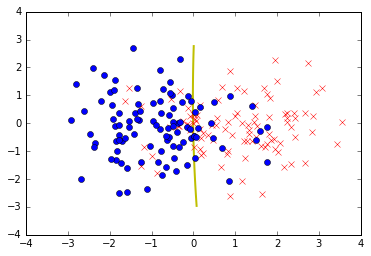

In [8]:
#确定两个不同的2变量高斯分布的均值向量和协方差矩阵
mean1 = [1, 0]
mean2 = [-1, 0]

#协方差矩阵相同
cov1 = [[1.0,0], [0,1.0]]
cov2= [[1.0,0], [0,1.0]]

#为每一种分布产生1000个训练数据
data1=np.random.multivariate_normal(mean1,cov1,10000)
data2=np.random.multivariate_normal(mean2,cov2,10000)


#根据4.2 高斯分类器中的数据分布来计算相关的分布函数

mean_train_1=np.sum(data1,axis=0)/len(data1)

mean_train_2=np.sum(data2,axis=0)/len(data2)

cov_train_1=np.cov(data1.T)

cov_train_2=np.cov(data2.T)



    
#产生一个从二维的从-3到3的meshgrid
x1=np.arange(-3,3,0.2)

x2=np.arange(-3,3,0.2)

X1,X2=np.meshgrid(x1,x2)

#X_combine是将X1,X2合并成为一个新的矩阵，矩阵的每一个元素是由X1和X2的相同位置的元素组成的一个2维矩阵，这个2维矩阵就是我们计算
#多变量高斯分布的输入(在我们的实例中是一个2变量)
#下面的这种合并方式具有一般性，应该记住
X_combine=np.vstack(([X1.T], [X2.T])).T



# 如果判别函数返回为0,那么该点为与决策边界上
#因为我们假定两个类别的先验分布都是0.5，即p1=p2=0.5,所以决策边界的判别仅仅将两个fi(x)相减即可
Z=multivariate_normal.pdf(X_combine,mean_train_1,cov_train_1)-multivariate_normal.pdf(X_combine,mean_train_2,cov_train_2)

fig=plt.figure()
#绘制数据点
#因为我们生成了10000个数据点，我们仅需要绘制前100个即可
plt.plot(data1[0:100,0],data1[0:100,1],'rx')
plt.plot(data2[0:100,0],data2[0:100,1],'bo')

cs=plt.contour(X1, X2, Z, [0.0], colors='y', linewidths=2, origin='lower')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

上图绘制的决策边界与我们推导出来的很接近